In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
# Load the dataset
df = pd.read_csv('/content/kag_risk_factors_cervical_cancer.csv')
df.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
df.shape

(858, 36)

<ipython-input-55-c7733416b2ce>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-55-c7733416b2ce>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


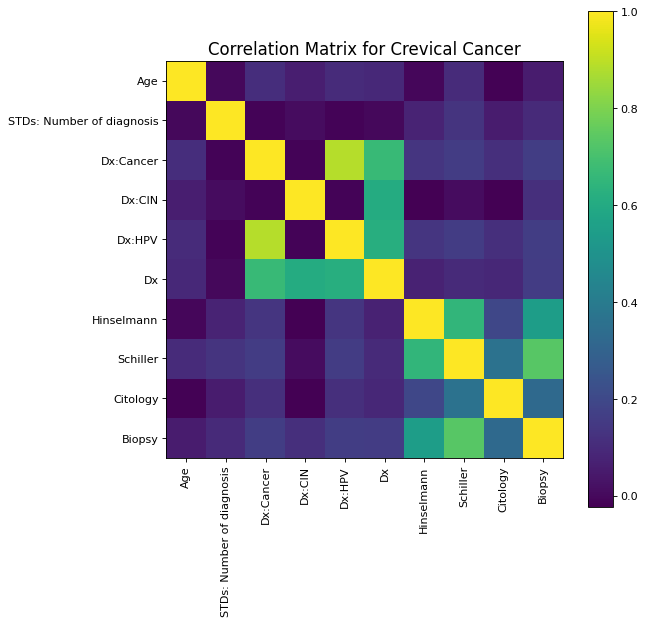

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Crevical Cancer', fontsize=15)
    plt.show()

plotCorrelationMatrix(df, 8)

In [ ]:
df = df.replace('?', np.NaN)

<Axes: >

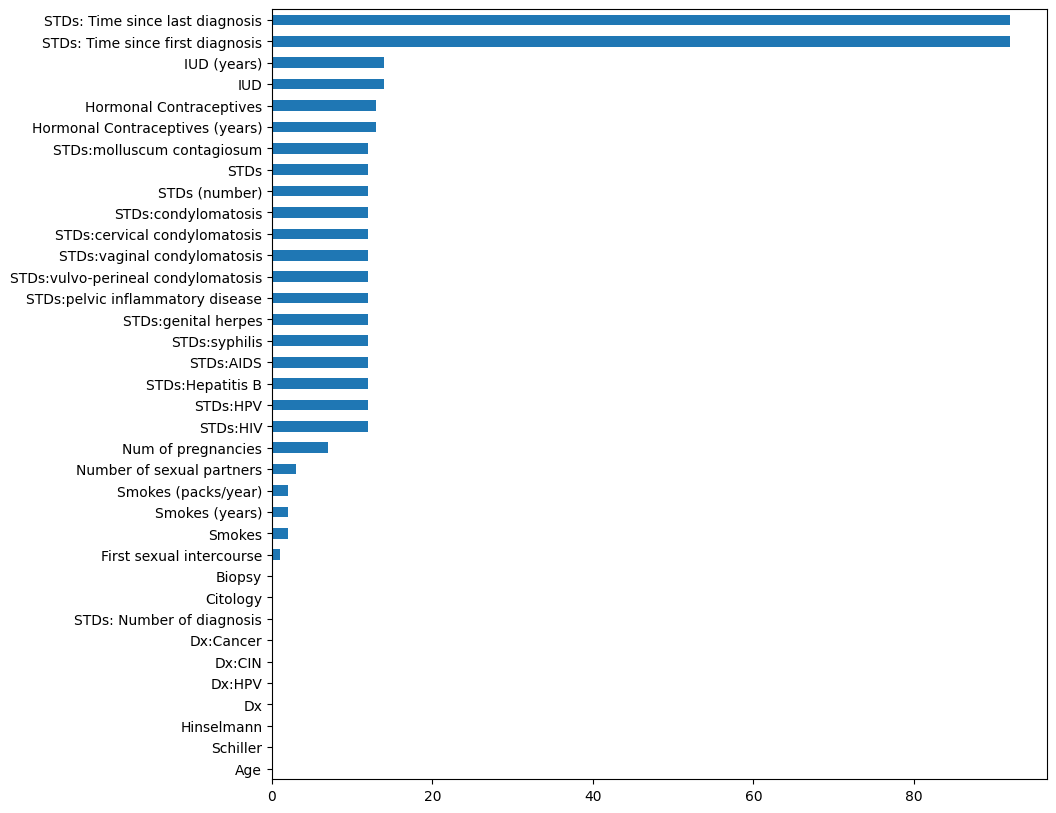

In [ ]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')

In [ ]:
df = df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
df = df.drop(df.index[df['Smokes'].isnull()] | df.index[df['First sexual intercourse'].isnull()])

<ipython-input-58-540fd87e56de>:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df = df.drop(df.index[df['Smokes'].isnull()] | df.index[df['First sexual intercourse'].isnull()])


In [ ]:
df.shape

(838, 34)

In [ ]:
print('Number of Missing Values in actual dataset')
df.isnull().sum()

Number of Missing Values in actual dataset


Age                                     0
Number of sexual partners              24
First sexual intercourse                0
Num of pregnancies                     56
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               102
Hormonal Contraceptives (years)       102
IUD                                   112
IUD (years)                           112
STDs                                  101
STDs (number)                         101
STDs:condylomatosis                   101
STDs:cervical condylomatosis          101
STDs:vaginal condylomatosis           101
STDs:vulvo-perineal condylomatosis    101
STDs:syphilis                         101
STDs:pelvic inflammatory disease      101
STDs:genital herpes                   101
STDs:molluscum contagiosum            101
STDs:AIDS                             101
STDs:HIV                              101
STDs:Hepatitis B                  

In [ ]:
# Drop any rows with missing values
df.dropna(inplace=True)

In [ ]:
df.shape

(668, 34)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a decision tree classifier
classifier = DecisionTreeClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions on the test data
y_pred = classifier.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred)
accuracy= classifier.score(X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print TPR, FPR, and ROC AUC score
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)

# Print evaluation metrics for Decision Tree
print("Decision Tree:")
print("Classification Report before feature selection and elemination :")
print(report)
print("Accuracy:", accuracy)
print("ROC AUC Score:", auc)

True Positive Rate (TPR): [0.         0.63636364 1.        ]
False Positive Rate (FPR): [0.         0.00813008 1.        ]
Decision Tree:
Classification Report before feature selection and elemination :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       123
           1       0.88      0.64      0.74        11

    accuracy                           0.96       134
   macro avg       0.92      0.81      0.86       134
weighted avg       0.96      0.96      0.96       134

Accuracy: 0.9626865671641791
ROC AUC Score: 0.8141167775314115


In [ ]:
# Separate the features (X) and the target variable (y)
X = df.drop(["Hinselmann", "Schiller", "Citology", "Biopsy"], axis=1)
y = df[["Biopsy"]]

In [ ]:
print(X)

     Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
5     42                       3.0                     23.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
3                  4.0    1.0          

In [ ]:
# Perform feature selection using SelectKBest and chi-square test
selector = SelectKBest(score_func=chi2, k=10)  # Select top 5 features
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

In [ ]:
from sklearn.feature_selection import RFE
# Perform feature elimination using Recursive Feature Elimination (RFE) with Random Forest
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.support_]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

In [ ]:
# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Hormonal Contraceptives (years)'],
      dtype='object')


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape

(534, 5)

In [ ]:

# Train the decision tree classifier using all features
clf_all = DecisionTreeClassifier(random_state=42)
clf_all.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred_dt = clf_all.predict(X_test)

In [ ]:
report_dt = classification_report(y_test, y_pred_dt)
accuracy_dt = clf_all.score(X_test, y_test)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_pred_dt)

# Print TPR, FPR, and ROC AUC score
print("True Positive Rate (TPR):", tpr_dt)
print("False Positive Rate (FPR):", fpr_dt)

# Print evaluation metrics for Decision Tree
print("Decision Tree:")
print("Classification Report before feature selection and elemination :")
print(report_dt)
print("Accuracy:", accuracy_dt)
print("ROC AUC Score:", auc_dt)

True Positive Rate (TPR): [0.         0.09090909 1.        ]
False Positive Rate (FPR): [0.         0.02439024 1.        ]
Decision Tree:
Classification Report before feature selection and elemination :
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       123
           1       0.25      0.09      0.13        11

    accuracy                           0.90       134
   macro avg       0.59      0.53      0.54       134
weighted avg       0.87      0.90      0.88       134

Accuracy: 0.9029850746268657
ROC AUC Score: 0.5332594235033259


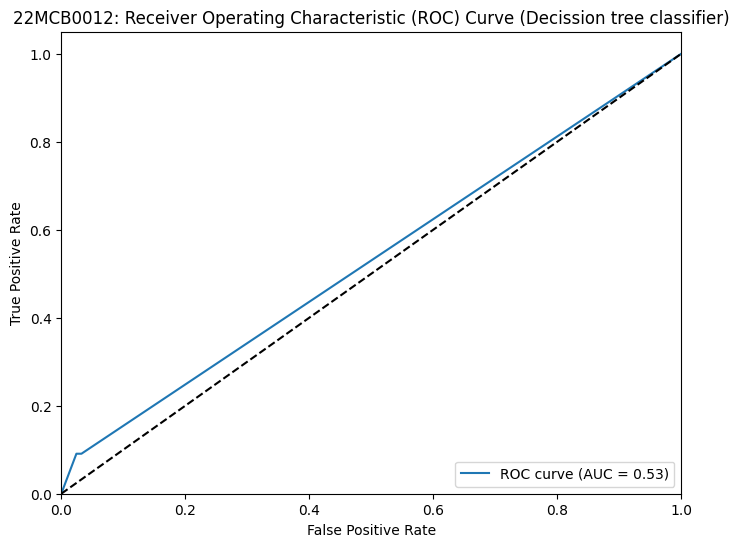

In [ ]:
# Calculate the predicted probabilities
y_probs = clf_all.predict_proba(X_test)[:, 1]

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('22MCB0012: Receiver Operating Characteristic (ROC) Curve (Decission tree classifier)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
regressor= RandomForestClassifier()
regressor.fit(X_train, y_train)

<ipython-input-79-7cb9a2c0059a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Make predictions
y_pred_rf= regressor.predict(X_test)

In [ ]:
report_rf = classification_report(y_test, y_pred_rf)
accuracy_rf = regressor.score(X_test, y_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

# Print TPR, FPR, and ROC AUC score
print("True Positive Rate (TPR):", tpr_rf)
print("False Positive Rate (FPR):", fpr_rf)

# Print evaluation metrics for Random Forest
print("Random Forest:")
print("Classification Report:")
print(report_rf)
print("Accuracy:", accuracy_rf)
print("ROC AUC Score:", auc_rf)

True Positive Rate (TPR): [0.         0.09090909 1.        ]
False Positive Rate (FPR): [0. 0. 1.]
Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       123
           1       1.00      0.09      0.17        11

    accuracy                           0.93       134
   macro avg       0.96      0.55      0.56       134
weighted avg       0.93      0.93      0.90       134

Accuracy: 0.9253731343283582
ROC AUC Score: 0.5454545454545454


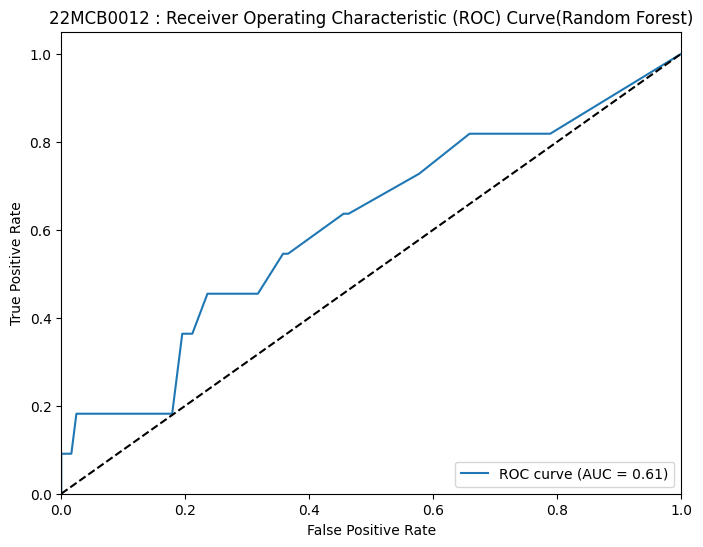

In [ ]:
# Calculate the predicted probabilities
y_probs = regressor.predict_proba(X_test)[:, 1]

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('22MCB0012 : Receiver Operating Characteristic (ROC) Curve(Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
nb= GaussianNB()
nb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
# Make predictions
y_pred_nb= nb.predict(X_test)

In [ ]:
report_nb = classification_report(y_test, y_pred_nb)
accuracy_nb = nb.score(X_test, y_test)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_nb)
auc_nb = roc_auc_score(y_test, y_pred_nb)

# Print TPR, FPR, and ROC AUC score
print("True Positive Rate (TPR):", tpr_nb)
print("False Positive Rate (FPR):", fpr_nb)

# Print evaluation metrics for Gaussian Naive Bayes
print("Gaussian Naive Bayes:")
print("Classification Report:")
print(report_nb)
print("Accuracy:", accuracy_nb)
print("ROC AUC Score:", auc_nb)

True Positive Rate (TPR): [0.         0.18181818 1.        ]
False Positive Rate (FPR): [0.         0.00813008 1.        ]
Gaussian Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       123
           1       0.67      0.18      0.29        11

    accuracy                           0.93       134
   macro avg       0.80      0.59      0.62       134
weighted avg       0.91      0.93      0.91       134

Accuracy: 0.9253731343283582
ROC AUC Score: 0.5868440502586844


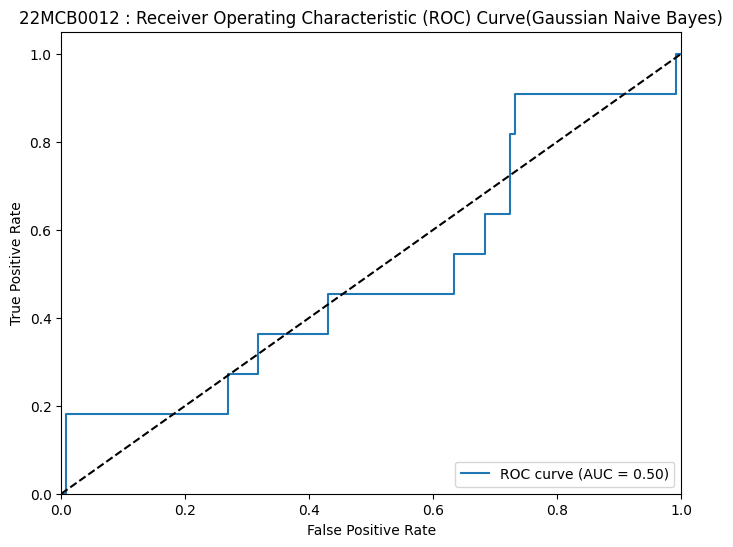

In [ ]:
# Calculate the predicted probabilities
y_probs = nb.predict_proba(X_test)[:, 1]

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('22MCB0012 : Receiver Operating Characteristic (ROC) Curve(Gaussian Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

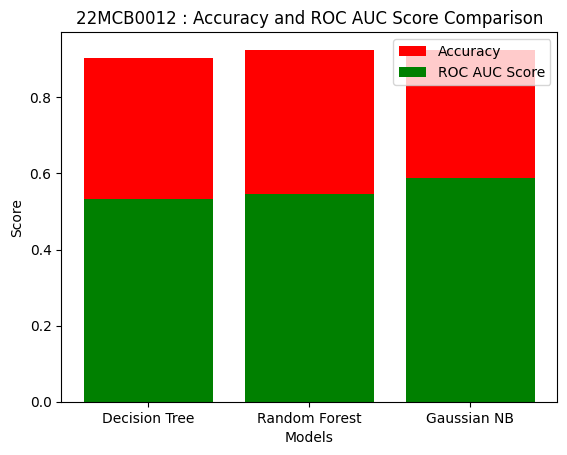

In [ ]:
# Visualize the accuracy and ROC AUC scores
models = ['Decision Tree', 'Random Forest', 'Gaussian NB']
accuracies = [accuracy_dt, accuracy_rf, accuracy_nb]
auc_scores = [auc_dt, auc_rf, auc_nb]

fig, ax = plt.subplots()
ax.bar(models, accuracies, label='Accuracy',color='red')
ax.bar(models, auc_scores, label='ROC AUC Score',color='green')
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('22MCB0012 : Accuracy and ROC AUC Score Comparison')
ax.legend()

plt.show()